<a href="https://colab.research.google.com/github/bitanb1999/HiggsBosonChallenge/blob/main/Rnn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HIGGS BOSON DATASET(continued)**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higgs-boson/training.zip
/kaggle/input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py
/kaggle/input/higgs-boson/random_submission.zip
/kaggle/input/higgs-boson/test.zip


# **Pre-requisites:**

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0    388      0 --:--:-- --:--:-- --:--:--   387
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=153cbe106f8c25a8f9eed4e3f326a89323cc6e718a4718c61bb2d5d176da901d
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built liac-arff
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=ec7a6a35f7649d2633b1e045b9a57b6697742c7ab1b19d666349809704a51870
  Stored in directory: /root/.cache/pip/wheels/42/71/95/7555ec3253e1ba8add72ae5febf1b015d297f3b73ba296d6f6
Successfully built pynisher
     |████████████████████████████████| 4.0 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 399 kB/s eta 0:00:01
  Created wheel for smac: filename=smac-0.13.1-

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

     |████████████████████████████████| 60 kB 299 kB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=07a60283732683d719373e4cf3335f5dcea2e877866f979749c3aa15d6ca92a0
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.1.0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.


In [ ]:

!pip install -U rfpimp
!pip install -U imbalanced-learn
%matplotlib inline
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import pickle
import csv
import collections
from rfpimp import *
from rfpimp import plot_corr_heatmap
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import FixedLenFeature
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize
import tensorflow as tf


  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=0248f2168deb519b941404aec0a728b6e7c324dd32a8bd8437cbb55b1f7117ab
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


# Datasets:

In [ ]:
training=pd.read_csv("/kaggle/input/higgs-boson/training.zip")
training.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
testing=pd.read_csv("/kaggle/input/higgs-boson/test.zip")
testing.set_index('EventId',inplace=True)
testing.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


*Here, we have the two datasets of the Higg Boson Challenge of 2014 which had the data for categorising the events as either a signal event or a background event. The accuracy of the classification model is to be calculated using the approximate median significance. The weights of each of the cases are also given.*

In [ ]:
print(training.shape,testing.shape)

(250000, 33) (550000, 30)


In [ ]:
train_dataX=training.drop(["Weight","Label"],axis=1)
train_dataX.set_index('EventId',inplace=True)
train_dataY=training['Label']


In [ ]:
train_dataY=pd.factorize(train_dataY)[0]

In [ ]:
from IPython.display import display, HTML

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
def tbl_report(tbl, cols=None, card=10):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    nulls = []
    uniques = []
    numuniques = []
    vcs = []
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        #if strdtcol == 'object' or strdtcol[0:3] == 'int' or strdtcol[0:3] == 'int':
        #print(strdtcol)
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card: # low cardinality
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join(["{}:{}".format(k,v) for k, v in valcounts.items()])
        else:
            vc='HC' # high cardinality
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return pretty_print(df[cols])
    return pretty_print(df)

**We will have a look at our training dataset before we run any EDA,Feature Engineering or Modelling**

In [ ]:
tbl_report(train_dataX)

Table Shape (250000, 30)


,dtype,nulls,uniques,num_uniques,value_counts
DER_mass_MMC,float64,0,"[138.47, 160.937, -999.0, 143.905, 175.864, 89.744, 148.754, 154.916, 105.594, 128.053, 114.744, 145.297, 82.488, 111.026, 114.256, 127.861, 90.736, 87.075, 141.481, 110.785, 76.883, 137.197, 111.271, 118.104, 98.761, 121.681, 129.186, 123.112, 156.894, 72.712, 134.153, 155.487, 138.362, 120.506, 109.684, 90.833, 122.516, 132.049, 84.86, 27.788, 201.473, 130.079, 167.534, 95.407, 219.057, 104.142, 219.292, 51.025, 148.523, 104.221, 73.819, 103.646, 122.934, 139.394, 92.065, 92.696, 83.081, 123.715, 94.229, 88.532, 101.675, 120.253, 96.906, 92.222, 98.597, 239.551, 86.629, 132.35, 123.29, 84.608, 166.64, 145.99, 99.668, 199.9, 92.079, 117.247, 235.976, 151.45, 124.118, 96.97, 96.379, 111.356, 98.181, 113.75, 124.575, 77.578, 107.35, 90.801, 95.787, 101.079, 130.123, 130.634, 208.573, 91.616, 109.829, 90.331, 114.661, 139.756, 87.523, 287.995, ...]",108338,HC
DER_mass_transverse_met_lep,float64,0,"[51.655, 68.768, 162.172, 81.417, 16.915, 13.55, 28.862, 10.418, 50.559, 88.941, 86.24, 10.286, 64.234, 31.663, 109.412, 32.096, 4.351, 50.953, 85.186, 88.767, 89.705, 18.674, 38.217, 0.736, 72.927, 34.384, 68.009, 27.18, 2.633, 14.024, 91.316, 6.041, 64.045, 62.758, 39.256, 20.762, 23.856, 61.072, 38.034, 22.729, 42.664, 62.236, 50.183, 65.682, 33.706, 68.032, 23.002, 53.335, 41.277, 21.584, 72.461, 37.94, 83.924, 98.947, 74.6, 50.315, 110.686, 31.911, 13.816, 83.737, 40.918, 73.141, 71.611, 65.274, 51.669, 63.334, 57.088, 78.683, 16.345, 72.911, 30.144, 70.619, 71.751, 16.05, 65.71, 41.715, 118.683, 33.856, 65.858, 52.954, 50.05, 65.312, 15.868, 68.862, 25.986, 71.692, 78.686, 42.327, 102.167, 55.918, 39.326, 59.132, 61.769, 17.118, 20.265, 68.298, 52.067, 34.558, 72.277, 20.354, ...]",101637,HC
DER_mass_vis,float64,0,"[97.827, 103.235, 125.953, 80.943, 134.805, 59.149, 107.782, 94.714, 100.989, 69.272, 79.692, 75.712, 103.565, 64.128, 14.398, 75.271, 67.963, 77.267, 68.827, 115.058, 41.765, 60.231, 67.041, 111.581, 82.775, 56.993, 78.296, 70.642, 77.31, 74.23, 51.771, 73.202, 69.499, 86.702, 122.894, 50.255, 100.96, 125.013, 99.038, 88.889, 86.064, 53.228, 87.682, 87.937, 67.847, 23.53, 104.041, 97.435, 123.308, 67.766, 124.835, 69.029, 136.152, 85.408, 177.143, 46.006, 65.448, 97.497, 71.225, 60.659, 64.244, 68.069, 78.711, 53.52, 68.835, 60.631, 81.811, 69.352, 50.14, 49.453, 82.176, 81.224, 74.602, 64.769, 56.525, 78.618, 193.111, 67.5, 106.57, 76.946, 63.451, 50.047, 80.477, 97.342, 60.637, 52.779, 167.085, 71.28, 79.738, 175.744, 108.268, 77.775, 93.213, 63.373, 50.19, 77.216, 76.262, 100.197, 58.168, 77.755, ...]",100558,HC
DER_pt_h,float64,0,"[27.98, 48.146, 35.635, 0.414, 16.405, 116.344, 106.13, 29.169, 4.288, 193.392, 27.201, 30.816, 106.999, 8.232, 17.323, 23.067, 47.221, 26.967, 5.042, 15.337, 18.437, 25.156, 2.347, 174.075, 30.888, 5.569, 35.332, 144.766, 91.388, 132.806, 33.742, 198.114, 63.165, 39.901, 71.682, 39.263, 9.377, 2.768, 65.021, 35.999, 0.23, 21.581, 102.403, 0.861, 18.079, 33.375, 60.49, 1.382, 9.909, 1.482, 5.506, 50.58, 40.286, 1.578, 2.423, 1.303, 49.395, 171.074, 27.029, 43.435, 135.726, 4.647, 28.947, 28.173, 39.384, 38.653, 53.612, 25.679, 95.309, 42.633, 38.736, 23.097, 39.664, 3.422, 1.118, 3.375, 6.549, 49.081, 124.84, 129.157, 0.658, 0.515, 77.915, 28.538, 192.267, 2.705, 77.236, 29.118, 34.164, 39.662, 19.727, 0.419, 0.51, 71.039, 104.878, 1.17, 1.25, 161.051, 153.606, 89.044, ...]",115563,HC
DER_deltaeta_jet_jet,float64,0,"[0.91, -999.0, 2.636, 0.733, 2.563, 1.955, 4.936, 3.676, 2.639, 5.087, 3.16, 1.814, 0.218, 3.28, 1.37, 4.437, 3.941, 0.482, 1.209, 1.494, 0.68, 4.557, 3.918, 2.978, 5.822, 1.575, 4.664, 1.048, 0.726, 6.108, 3.243, 2.604, 4.449, 0.237, 2.463, 3.022, 2.685, 3.655, 2.893, 4.868, 0.313, 4.023, 0.69, 0.698, 4.761, 0.006, 2.594, 0.9, 5.762, 3.015, 0.833, 0.191, 0.718, 0.918, 1.441, 0.019, 4.261, 4.297, 2.675, 0.463, 1.127, 0.617, 0.065, 4.035, 0.441, 0.916, 3.66, 2.541, 0.647, 3.342, 3.483, 0.661, 1.124, 3.384, 0

Our dataset has one categorical variable and rest all continuous variable.

In [ ]:
cat_vars=['PRI_jet_num']
cont_vars=np.array(train_dataX.drop('PRI_jet_num',axis=1).columns)

In [ ]:
cont_vars

array(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta',
       'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi',
       'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt'], dtype=object)

# Recurrent Neural Networks 

*In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.image.png
RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).*

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
train_df=training.drop('Weight',axis=1)

In [ ]:
enc = LabelEncoder()

train_df['Label'] = enc.fit_transform(train_df['Label'])
train_df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [ ]:
train_df.set_index(['EventId'],inplace = True)


In [ ]:
testing.shape,train_df.shape

((550000, 30), (250000, 31))

In [ ]:
X = train_df.drop(['Label'], axis=1)
y = train_df['Label'].values
X = normalize(X)
test_df_nor = normalize(testing)

In [ ]:
#split to maintain the imbalance
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)

for train,test in splitter.split(X,y):     
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
import os
import csv
import math


def create_solution_dictionary(solution):
    """ Read solution file, return a dictionary with key EventId and value (weight,label).
    Solution file headers: EventId, Label, Weight """
    
    solnDict = {}
    with open(solution, 'rb') as f:
        soln = csv.reader(f)
        soln.next() # header
        for row in soln:
            if row[0] not in solnDict:
                solnDict[row[0]] = (row[1], row[2])
    return solnDict
def check_submission(submission, Nelements):
    """ Check that submission RankOrder column is correct:
        1. All numbers are in [1,NTestSet]
        2. All numbers are unqiue
    """
    rankOrderSet = set()    
    with open(submission, 'rb') as f:
        sub = csv.reader(f)
        sub.next() # header
        for row in sub:
            rankOrderSet.add(row[1])
            
    if len(rankOrderSet) != Nelements:
        print ('RankOrder column must contain unique values')
        exit()
    elif rankOrderSet.isdisjoint(set(xrange(1,Nelements+1))) == False:
        print ('RankOrder column must contain all numbers from [1..NTestSset]')
        exit()
    else:
        return True
    def AMS(s, b):
        """ Approximate Median Significance defined as:
            AMS = sqrt(
                    2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
                  )        
        where b_r = 10, b = background, s = signal, log is natural logarithm """

        br = 10.0
        radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
        if radicand < 0:
            print ('radicand is negative. Exiting')
            exit()
        else:
            return math.sqrt(radicand)
    def AMS_metric(solution, submission):
        """  Prints the AMS metric value to screen.
        Solution File header: EventId, Class, Weight
        Submission File header: EventId, RankOrder, Class
        """

        numEvents = 550000 # number of events = size of test set

        # solutionDict: key=eventId, value=(label, class)
        solutionDict = create_solution_dictionary(solution)

        signal = 0.0
        background = 0.0
        if check_submission(submission, numEvents):
            with open(submission, 'rb') as f:
                sub = csv.reader(f)
                sub.next() # header row
                for row in sub:
                    if row[2] == 's': # only events predicted to be signal are scored
                        if solutionDict[row[0]][0] == 's':
                            signal += float(solutionDict[row[0]][1])
                        elif solutionDict[row[0]][0] == 'b':
                            background += float(solutionDict[row[0]][1])

            print ('signal = {0}, background = {1}'.format(signal, background))
            print ('AMS = ' + str(AMS(signal, background)))


        if __name__ == "__main__":

            # enter path and file names here    
            path = ""
            solutionFile = ""
            submissionFile = ""

In [ ]:
def build_rnn_model(train_x,train_y,test_x,test_y):
    inp = Input(shape=(train_x.shape[1],train_x.shape[2]))
    rnn_1st_model = LSTM(units=60, return_sequences=True,recurrent_dropout=0.1)(inp)
    rnn_2nd_model = LSTM(units=60,recurrent_dropout=0.1)(rnn_1st_model)
    dense_layer = Dense(128)(rnn_2nd_model)
    drop_out = Dropout(0.2)(dense_layer)
    output = Dense(1, activation= LeakyReLU(alpha=0.1),name="class")(drop_out)
    model = Model(inp, output)
    callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
                 EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model_LSTM.h5', monitor='val_loss', save_best_only=True)]
    model.summary()
    model.compile(loss=[tf.keras.losses.BinaryCrossentropy( from_logits=False, label_smoothing=0, 
    name='binary_crossentropy'),
                        tf.keras.losses.BinaryCrossentropy( from_logits=False, label_smoothing=0,
    name='binary_crossentropy')], optimizer="adam")
    history = model.fit(train_x, train_y, 
          epochs = 40, 
          batch_size = 100, 
          validation_data=(test_x,  test_y), 
          callbacks=callbacks)
    return history,model

In [ ]:
def plot_Loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [ ]:
def Save_Result_To_Csv(model,model_name,csv_file):
    test_pre = np.reshape(test_df_nor, (test_df_nor.shape[0],test_df_nor.shape[1],1))
    model.load_weights(model_name)
    prediction = model.predict(test_pre)
    prediction =  np.where(prediction > 0.5, 1, 0)
    prediction = pd.Series(prediction[:,0])
    sub = pd.read_csv('../input/higgs-boson/random_submission.zip')
    test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":prediction})
    test_predict['Class'] = test_predict['Class'].replace(1,'s')
    test_predict['Class'] = test_predict['Class'].replace(0,'b')
    test_predict.to_csv(csv_file,index=False)

In [ ]:
history_RNN,Rnn_model = build_rnn_model(X_train,y_train,X_test,y_test)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 60)            14880     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7808      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 129       
Total params: 51,857
Trainable params: 51,857
Non-trainable params: 0
_______________________________________________________

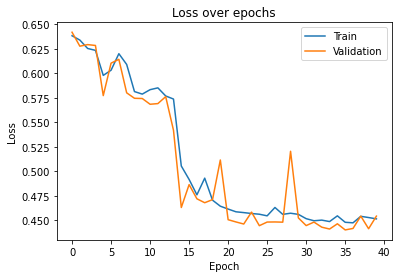

In [ ]:
plot_Loss(history_RNN)

In [ ]:
Save_Result_To_Csv(Rnn_model,"./best_model_LSTM.h5","submission_Rnn.csv")

In [ ]:
sub=pd.read_csv("./submission_Rnn.csv")
sub.head()


,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,b


#Inference and Conclusion:
    Models	                     Imbalanced Data	Balanced Data
    1. Logistic Regression           	     0.76	        0.81
    2. Decision Tree	                      0.88	        0.89
    3. Random Forest	                      0.89	        0.89
    4. Boosting	                           0.89	        0.91
a. The ROC_AUC score of the decision tree and the random forest is almost the same. So, we plot the Precision and recall curve to get a better look into it. Random Forest does a better job in the precision Recall curve with respect to the decision Tree.

b. The ensemble models seem to do a good job when it comes to ROC_AUC curves but fail to produce an impactful AMS score. Calibrated Models are also tried out, which too don’t do a good classification, which is expected. The models, in general were well calibrated. The Recurring Neural Network model did a better job with a AMS score of 2.35 approx.

c. The models in general showed that the data was dependent on only 10 features.The Boosting model had the highest area under the curve and precision recall curve and hence predicted the signal and background events with 90% accuracy on average.

d. The models on an average, predict the signal event with a 89% accuracy and hence, more regulation and more research can fine tune the features to obtain ensemble predictive rate of 95% or more.



#Further Scope:
Machine learning has led to significant advances in many fields such  as  data  analysis,  web  search,  photo  tagging  and  spam detector,  etc.  They  are  clearly  useful  in  a  wide  range  of application, including a large host of application in the natural science. The  problems in high-energy physics are  particularly made  suitable  for  machine  learning,  by having  large data  set with  complicated  underlying  structure  in  it.  Results  shows machine learning can  be used for providing a powerful means as  well  as the  best practical  approach to  analyzing  particles collider  data.  On  this  specific  basis  of  results,  it  clearly specifies  that  the  most  accurate  classifiers  are  Logistic Regression,  Gradient Boosting  and  Random Forest  but there are  some  drawbacks  when  it comes  to  time  analysis  of  the above classifiers. Turns out Logistic Regression is the most optimized of them all but took more time than Decision Tree. Therefore, we can say that Decision Tree is the most efficient classifier when it comes to inspecting such large data sets with accuracy and computational time.  Future Scope Based  on  these  results,  maybe  these  algorithms  might  not perform well in general but assembling several algorithms can be performed to  produce better  results(Stacking). In  this case, Random Forest  and  Gradient  Boosting  were  better  than  other algorithms  but  this was  on  pre-recorded  data.  However, we can  generate  more  potentially  powerful  algorithms  by ensemble technique which can be used to analyze the data and will  help  in  online  filtering  of  streaming  detector measurements.